# DMoz dataset exploration

In [3]:
import pandas as pd
import os

In [5]:

data_directory = "data/"
files = os.listdir(data_directory)
files

['Arts.csv',
 'business.csv',
 'computers.csv',
 'games.csv',
 'health.csv',
 'home.csv',
 'news.csv',
 'reference.csv',
 'science.csv',
 'shopping.csv',
 'society.csv']

Every file is a category and it contains list of websites. Let's loop through all of them and combine them into a single dataframe and check out the contents

In [6]:
#looping through all of them 
df_list = []
for file in files:
    df_list.append(pd.read_csv(data_directory+file))
websites_df = pd.concat(df_list,sort=False)

In [7]:
websites_df.shape

(825848, 7)

In [10]:
websites_df.columns

Index(['Description', 'Title', 'URL', 'Sites', 'CCat', 'MCat', 'SCat'], dtype='object')

In [9]:
websites_df.sample(3)

,Description,Title,URL,Sites,CCat,MCat,SCat
62765,Dedicated to the market for innovation in lang...,Language Technology,http://dmoztools.net/Science/Social_Sciences/L...,http://www.lang-tech.org/,2002,Science,Social Sciences Linguistics Conferences
22902,Suppliers of Sports Banners.,Hernandez Airbrushing,http://dmoztools.net/Arts/Illustration/Airbrush/,http://www.blakbirdz.com/airbrush/index.htm,Airbrush,Arts,Illustration
10172,Annual conference focused on the Latin America...,Latin American Gaming Exhibition,http://dmoztools.net/Business/Arts_and_Enterta...,http://expoazar.com/,Conferences,Business,Arts and Entertainment Gaming


In [23]:
len(websites_df["MCat"].unique()), websites_df["MCat"].unique()

(11,
 array(['Arts', 'Business', 'Computers', 'Games', 'Health', 'Home', 'News',
        'Reference', 'Science', 'Shopping', 'Society'], dtype=object))

There are 11 different Main categories

In [21]:
len(websites_df["SCat"].unique()), websites_df["SCat"].unique()

(22989,
 array([' Animation  Anime', ' Animation  Anime  Collectibles',
        ' Animation  Anime  Collectibles  Models and Figures', ...,
        ' Work  Work and Family', ' Work  Workplace Discrimination',
        ' Work  Workplace Spirituality'], dtype=object))

There are 22989 sub cateogries

In [22]:
len(websites_df["CCat"].unique()), websites_df["CCat"].unique()

(63533,
 array(['Characters', 'Clubs and Organizations', 'Collectibles', ...,
        'Age Discrimination', 'Workplace Spirituality',
        'Workweek Reduction'], dtype=object))

There are 63533 C Categories

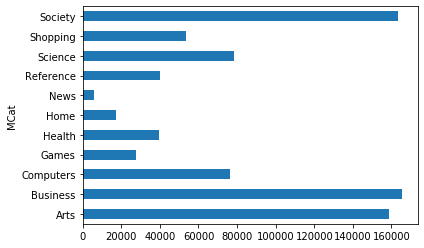

In [29]:
import matplotlib.pyplot as plt
websites_df.groupby(["MCat"]).size().plot.barh()

In [39]:
pd.DataFrame(websites_df.groupby(["MCat","SCat"]).size())

0
MCat    SCat                                                   
Arts     Animation                                          157
         Animation  Anime                                   166
         Animation  Anime  Collectibles                      17
         Animation  Anime  Collectibles  Models and Fig...    8
         Animation  Anime  Collectibles  Models and Fig...    3
...                                                         ...
Society  Work  Unemployment                                   2
         Work  Work and Family                                8
         Work  Workaholism                                    1
         Work  Workplace Discrimination                      23
         Work  Workplace Spirituality                         8

[23049 rows x 1 columns]

In [40]:
pd.DataFrame(websites_df.groupby(["SCat","CCat"]).size())

0
SCat                                       CCat                      
 Accounting                                Associations            93
                                           Business-to-Business    21
                                           CPE For CPAs            45
                                           Education and Training  30
                                           Employment               3
...                                                                ..
 Yard, Deck, and Table Games               Table Hockey             5
                                           Table Soccer             1
                                           Washer Pitching          1
 Yard, Deck, and Table Games  Table Soccer Foosball                23
                                           Subbuteo                 3

[112025 rows x 1 columns]